In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from scipy.sparse import  hstack
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from scipy import sparse
from scipy.sparse import  hstack
import time
import os, gc
import sys

In [2]:
# Set display options
#Limiting floats output to 3 decimal points 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [3]:
# Functions
def MissingValues(x):
    z1 = x.isnull()
    z2 = np.sum(z1, axis = 0)
    z3 = z2[z2 > 0]
    z4 = ( z3 / len(df) ) * 100
    return (z4)

def DoDummy(x):    
    le = LabelEncoder()
    y = x.apply(le.fit_transform)
    enc = OneHotEncoder(categorical_features = "all")
    enc.fit(y)
    trans = enc.transform(y)
    return(trans)  

def scaleDataset(df):
    col_names = df.columns.values
    ss = StandardScaler()
    return pd.DataFrame(ss.fit_transform(df), columns=col_names)


In [5]:
tr= pd.read_csv("train.csv", header = 0, delimiter=',')
test= pd.read_csv("test.csv", header = 0, delimiter=',')

In [6]:
# View tr data
tr.shape

(1460, 81)

In [7]:
# View tr data
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# View test data
test.shape

(1459, 80)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

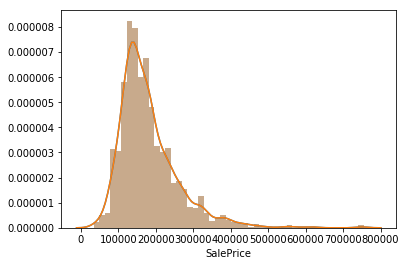

In [11]:
# Visualization
#dist plot of sale price
sns.distplot(tr.SalePrice)
plt.show()

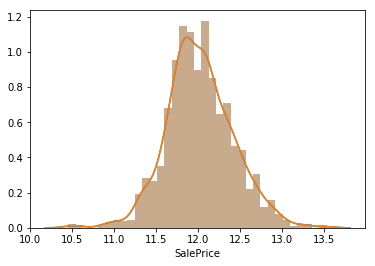

In [13]:
# Viewing a more normalized distribution by plotting log of Sale Price
logPrice = np.log1p(tr.SalePrice)
sns.distplot(logPrice)
plt.show()

In [14]:
# Correlation of Sale Price (target variable) with other variables
corplot = tr.corr()
corplot.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corplot.SalePrice)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


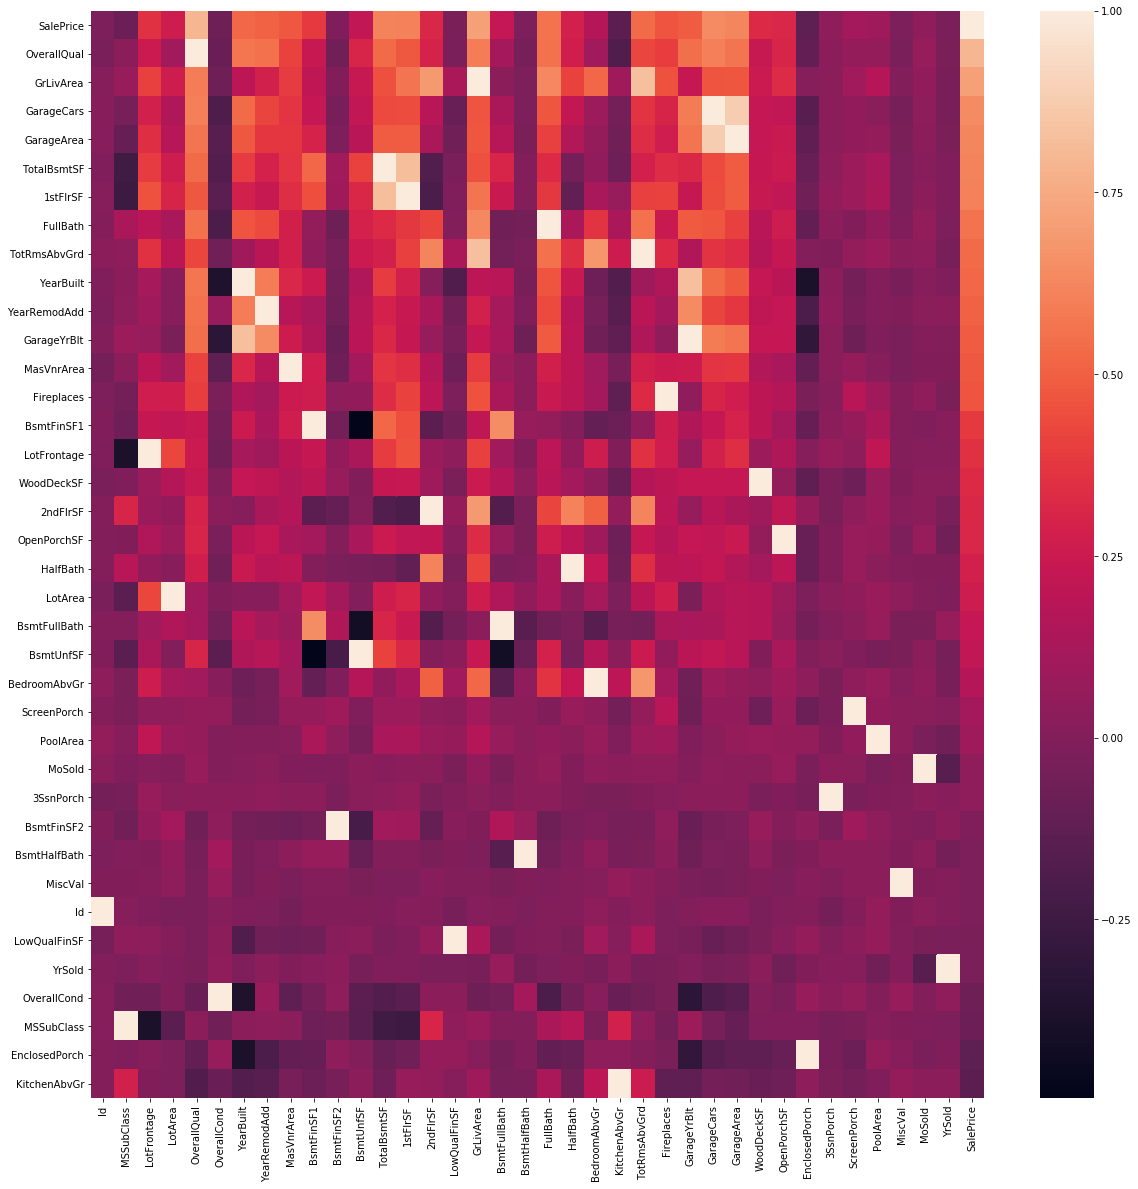

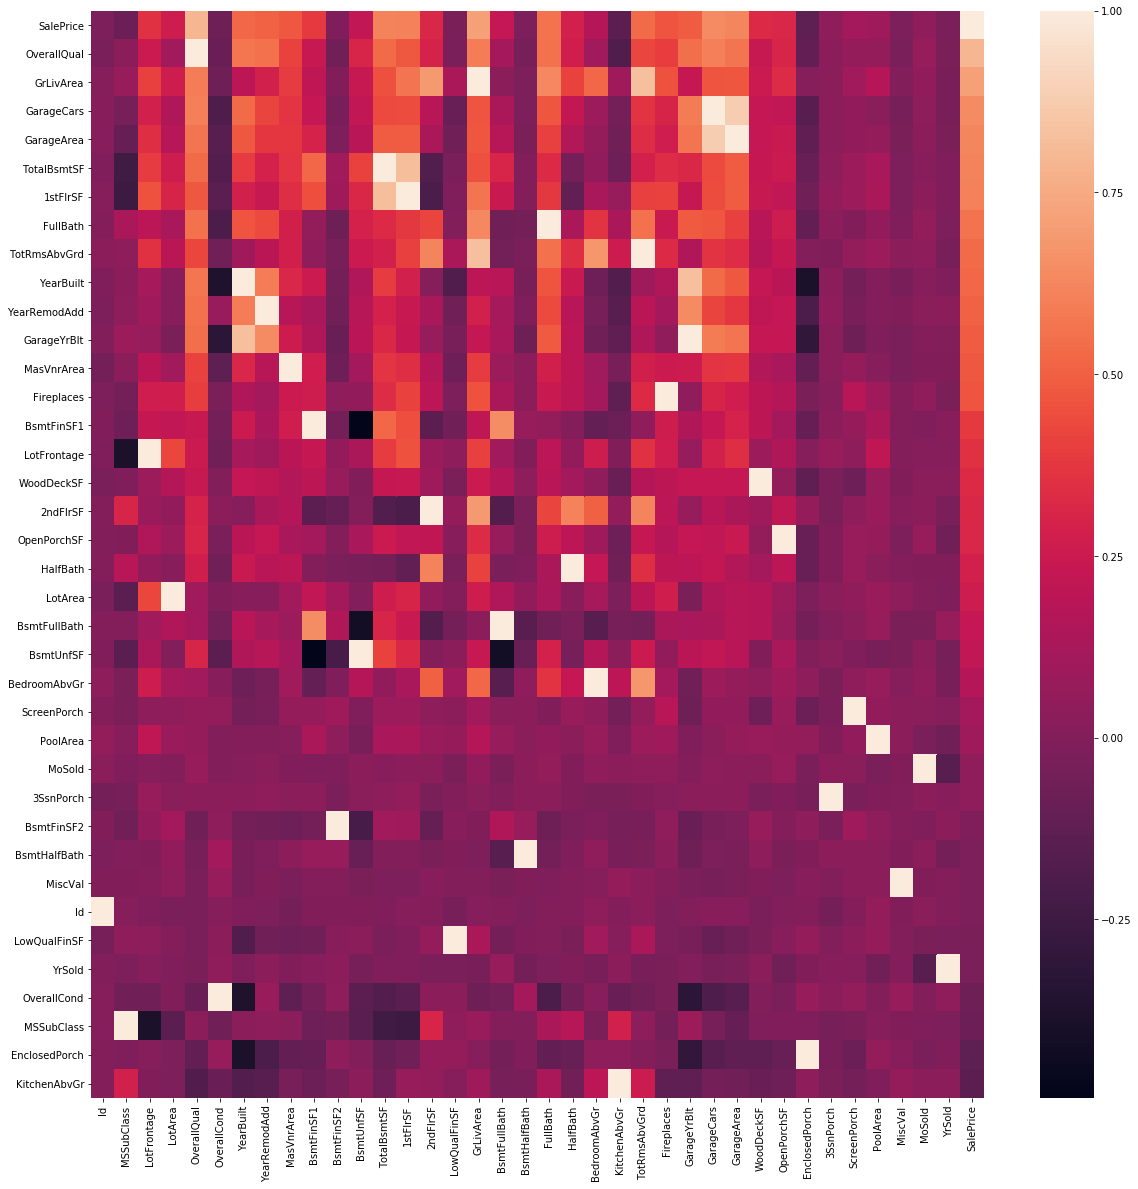

In [16]:
#Plot of the correlation
plt.subplots(figsize=(20,20))
sns.heatmap(corplot)
plt.show()

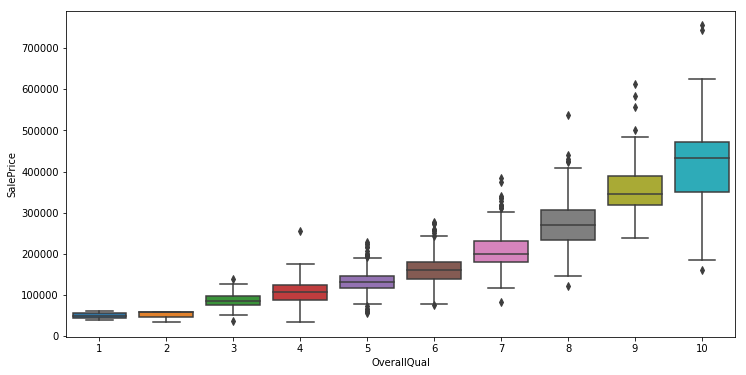

In [17]:
# From here, we pick 2 variables that show a high correlation with Sale Price
# OverallQual (categorical) & GrLivArea (numeric)

# Plotting OverallQual vs SalePrice
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'OverallQual', y = 'SalePrice',  data = tr) # shows a strong relationship between OverallQual & SalePrice
plt.show()

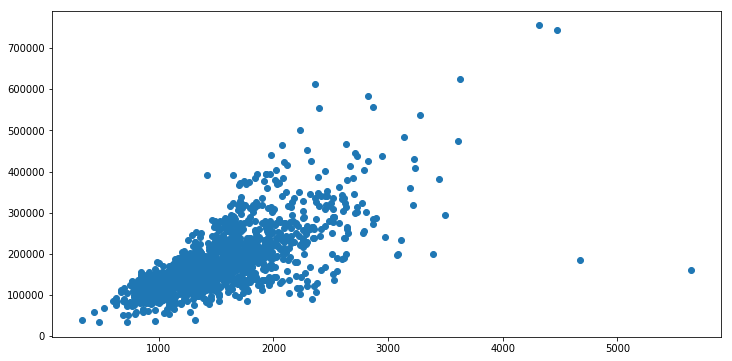

In [18]:
# Plotting GrLivArea vs SalePrice
plt.figure(figsize = (12, 6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice',  data = tr) # shows an almost linear relationship between GrLivArea & SalePrice
plt.show()

In [19]:
# Here we see 2 outliers that can be removed
tr = tr.drop(tr[(tr['GrLivArea']>4000) & (tr['SalePrice']<300000)].index)


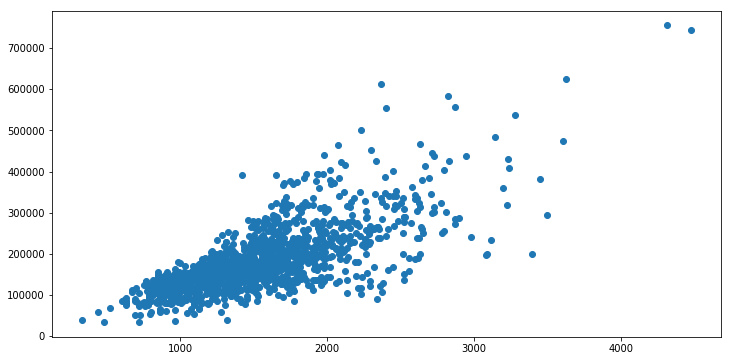

In [20]:
#View the plot again
plt.figure(figsize = (12, 6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice',  data = tr) 
plt.show()

In [21]:
# Data pre-processing
# Drop the Id & SalePrice columns from tr
tr.shape
s1 = tr['SalePrice']
tr.drop( ['Id','SalePrice'], inplace = True, axis = 'columns')
tr.shape

(1458, 79)

In [22]:
# Drop Id column from test
test.shape
test.drop( ['Id'], inplace = True, axis = 'columns')
test.shape

(1459, 79)

In [23]:
# Stack the datasets
frames = [tr,test]
df = pd.concat(frames, axis = 'index')    # Concatenate along index/rows
df.shape

(2917, 79)

In [24]:
# Find cols with missing data
df_na = MissingValues(df).sort_values(ascending=False)
df_na

PoolQC         99.691
MiscFeature    96.400
Alley          93.212
Fence          80.425
FireplaceQu    48.680
LotFrontage    16.661
GarageFinish    5.451
GarageYrBlt     5.451
GarageQual      5.451
GarageCond      5.451
GarageType      5.382
BsmtExposure    2.811
BsmtCond        2.811
BsmtQual        2.777
BsmtFinType2    2.743
BsmtFinType1    2.708
MasVnrType      0.823
MasVnrArea      0.788
MSZoning        0.137
BsmtFullBath    0.069
BsmtHalfBath    0.069
Utilities       0.069
Functional      0.069
Exterior2nd     0.034
Exterior1st     0.034
SaleType        0.034
BsmtFinSF1      0.034
BsmtFinSF2      0.034
BsmtUnfSF       0.034
Electrical      0.034
KitchenQual     0.034
GarageCars      0.034
GarageArea      0.034
TotalBsmtSF     0.034
dtype: float64

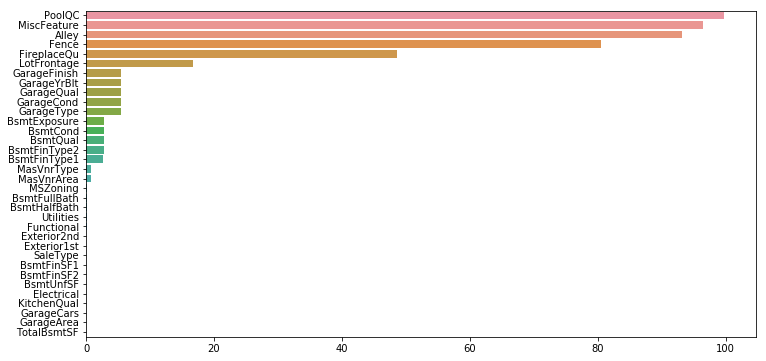

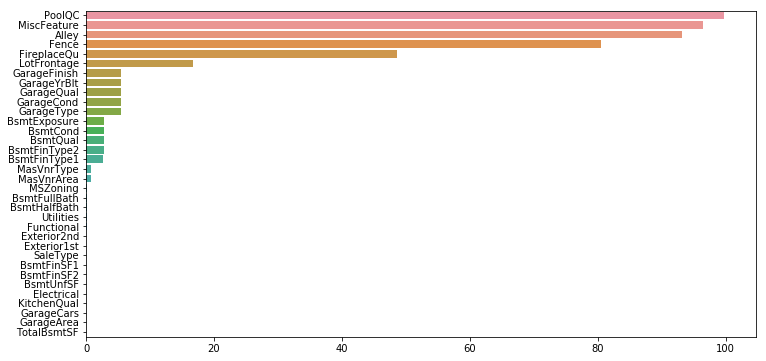

In [26]:
# Plot of missing values
plt.figure(figsize = (12, 6))
sns.barplot(x = df_na, y = df_na.index.values)
plt.show()

In [27]:
#remove NAs
# Missing values for these fields can be replaced with NA
FillWithNA = ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish',
              'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure',
              'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'KitchenQual')

for col in FillWithNA:
    df[col] = df[col].fillna("NA")

In [28]:
# Missing values for these fields can be replaced with 0
FillWith0 = ('LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath',
             'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'GarageCars', 'GarageArea', 'TotalBsmtSF')

for col in FillWith0:
    df[col] = df[col].fillna(0)

In [29]:
# Missing values for these fields can be replaced with None
FillWithNone = ('MasVnrType', 'MSZoning', 'Utilities', 'Functional',
             'Exterior2nd', 'Exterior1st', 'Electrical')

for col in FillWithNone:
    df[col] = df[col].fillna("None")

In [30]:
# Missing values for these fields can be replaced with Other
df["SaleType"] = df["SaleType"].fillna("Oth")

In [33]:
# Recheck cols with missing data
df_na = MissingValues(df)
df_na

Series([], dtype: float64)

In [34]:
# Convert categorical data
num_cols = df.select_dtypes(include=[np.number]).columns.values
cat_cols = df.columns.difference(num_cols)

df_dummy = DoDummy(df[cat_cols])
df_dummy.shape

(2917, 272)

In [35]:
# Now bind both
df_sp = hstack((df_dummy, df[num_cols]), format = "csr")   # Output is csr-sparse format
df_sp.shape

(2917, 308)

In [36]:
#Unstack tr and test, sparse matrices
df_train = df_sp[ : tr.shape[0] , : ]
df_test = df_sp[tr.shape[0] :, : ]
df_train.shape

(1458, 308)

In [37]:
df_test.shape

(1459, 308)

In [38]:
# Partition datasets into train + validation data
y = np.log1p(s1)    
X_train, X_valid, y_train, y_valid = train_test_split(
                                     df_train, y,
                                     test_size=0.60,
                                     random_state=60
                                     )

In [39]:
# Random Forest Regressor
# Instantiate a RandomRegressor object
start = time.time()
regr = RandomForestRegressor(n_estimators=600,       # No of trees in forest
                             criterion = "mse",       # Can also be mae
                             max_features = "sqrt",  # no of features to consider for the best split
                             max_depth= 60,    #  maximum depth of the tree
                             min_samples_split= 2,   # minimum number of samples required to split an internal node
                             min_impurity_decrease=0, # Split node if impurity decreases greater than this value.
                             oob_score = True,       # whether to use out-of-bag samples to estimate error on unseen data.
                             n_jobs = -1,            #  No of jobs to run in parallel
                             random_state=0,
                             verbose = 10            # Controls verbosity of process
                             )


regr.fit(X_train,y_train)

# Prediction and performance
rf_sp=regr.predict(X_valid)
squared = np.square(rf_sp - y_valid)
rf_error = np.sqrt(np.sum(squared)/len(y_valid))

end = time.time()
rf_model_time=(end-start)/60.0


building tree 1 of 600building tree 2 of 600
building tree 3 of 600building tree 4 of 600
building tree 8 of 600

building tree 5 of 600
building tree 7 of 600building tree 6 of 600
building tree 12 of 600

building tree 10 of 600
building tree 9 of 600building tree 11 of 600


building tree 13 of 600building tree 14 of 600building tree 15 of 600building tree 16 of 600



building tree 17 of 600
building tree 19 of 600building tree 18 of 600building tree 20 of 600


building tree 23 of 600building tree 21 of 600building tree 22 of 600


building tree 24 of 600
building tree 25 of 600building tree 26 of 600
building tree 27 of 600
building tree 28 of 600

building tree 29 of 600building tree 30 of 600
building tree 31 of 600building tree 32 of 600


building tree 33 of 600building tree 34 of 600

building tree 35 of 600building tree 36 of 600

building tree 37 of 600
building tree 38 of 600
building tree 39 of 600building tree 40 of 600

building tree 41 of 600
building tree 42 of 600bu

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.1s



building tree 110 of 600building tree 111 of 600


building tree 112 of 600
building tree 113 of 600
building tree 114 of 600
building tree 115 of 600
building tree 116 of 600
building tree 117 of 600
building tree 118 of 600
building tree 119 of 600
building tree 120 of 600
building tree 121 of 600
building tree 122 of 600
building tree 123 of 600
building tree 124 of 600building tree 125 of 600

building tree 126 of 600
building tree 127 of 600
building tree 128 of 600building tree 129 of 600

building tree 130 of 600
building tree 131 of 600building tree 132 of 600

building tree 134 of 600building tree 133 of 600

building tree 135 of 600
building tree 136 of 600building tree 137 of 600

building tree 138 of 600
building tree 140 of 600building tree 141 of 600building tree 139 of 600building tree 142 of 600



building tree 143 of 600
building tree 144 of 600building tree 145 of 600

building tree 146 of 600
building tree 147 of 600building tree 148 of 600
building tree 149 of 600

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    0.3s


building tree 227 of 600
building tree 228 of 600
building tree 229 of 600
building tree 230 of 600
building tree 231 of 600
building tree 232 of 600
building tree 233 of 600
building tree 234 of 600
building tree 235 of 600
building tree 236 of 600
building tree 237 of 600
building tree 238 of 600
building tree 239 of 600building tree 240 of 600

building tree 241 of 600building tree 242 of 600

building tree 243 of 600
building tree 244 of 600
building tree 245 of 600building tree 246 of 600
building tree 247 of 600

building tree 248 of 600
building tree 249 of 600
building tree 250 of 600
building tree 251 of 600
building tree 252 of 600
building tree 253 of 600
building tree 254 of 600
building tree 255 of 600
building tree 256 of 600
building tree 257 of 600
building tree 258 of 600
building tree 259 of 600
building tree 260 of 600
building tree 261 of 600building tree 262 of 600building tree 263 of 600


building tree 264 of 600building tree 265 of 600

building tree 266 of 600


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    0.5s


building tree 344 of 600building tree 345 of 600
building tree 346 of 600

building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600building tree 374 of 600

building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600building tree 382 of 600
building tree 383 of 600



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s


building tree 461 of 600building tree 462 of 600building tree 463 of 600



building tree 464 of 600
building tree 465 of 600building tree 466 of 600

building tree 467 of 600
building tree 468 of 600
building tree 469 of 600
building tree 470 of 600
building tree 471 of 600
building tree 472 of 600
building tree 473 of 600
building tree 474 of 600
building tree 475 of 600
building tree 476 of 600
building tree 477 of 600
building tree 478 of 600
building tree 479 of 600
building tree 480 of 600
building tree 481 of 600
building tree 482 of 600
building tree 483 of 600
building tree 484 of 600
building tree 485 of 600building tree 486 of 600
building tree 487 of 600

building tree 488 of 600
building tree 489 of 600
building tree 490 of 600building tree 491 of 600

building tree 492 of 600
building tree 493 of 600building tree 494 of 600

building tree 496 of 600
building tree 495 of 600
building tree 497 of 600
building tree 498 of 600
building tree 499 of 600
building tree 500 of 600

[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:    1.0s


building tree 570 of 600building tree 569 of 600

building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600building tree 583 of 600

building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 591 of 600
building tree 592 of 600
building tree 593 of 600building tree 594 of 600building tree 595 of 600


building tree 596 of 600building tree 597 of 600

building tree 598 of 600building tree 599 of 600

building tree 600 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.0s
[Parallel(n_jo

In [40]:
print("Time taken to model: ", rf_model_time , " minutes" )
print("OOB score: ", regr.oob_score_ )
print("RMSE for Random Regressor : ", rf_error)

Time taken to model:  0.03303565581639608  minutes
OOB score:  0.8570915356582958
RMSE for Random Regressor :  0.16470808304481618


In [41]:
# Ridge Regression
start = time.time()
modelr = Ridge(alpha = 1.0,            
              solver = "lsqr",        
              fit_intercept=False     
              )

modelr.fit(X_train, y_train)
ridge_pre = modelr.predict(X_valid)
squared = np.square(ridge_pre-y_valid)
ridge_error = np.sqrt(np.sum(squared)/len(y_valid))

end = time.time()
ridge_model_time=(end-start)/60.0


In [42]:
print("Time taken to model: ", ridge_model_time , " minutes" )
print("RMSE for Ridge: ", ridge_error)



Time taken to model:  0.001806338628133138  minutes
RMSE for Ridge:  0.18150250679432428
